In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gplearn as gp
from gplearn.genetic import SymbolicRegressor
from gplearn.functions import make_function

plt.rcParams.update({'mathtext.default':'regular'}) # Latex in text
sns.set(context='notebook', font='Times New Roman', font_scale=1, style='ticks')
%matplotlib notebook

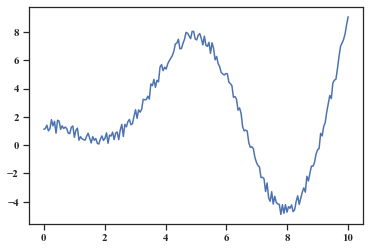

In [59]:
x= np.linspace(0,10,200)
fun=[0.004*x**3+0.03*x**2+0.5*x+np.random.rand(len(x)),
     0.0054*x**4-0.003*x**3+0.03*x**2-.4*x+np.random.rand(len(x)),
     x**5+x**4+x**3+x**2+x+np.random.rand(len(x)),
     x**6+x**5+x**4+x**3+x**2+x+np.random.rand(len(x)),
    np.sin(x**2)*np.cos(x)-1+np.random.rand(len(x)),
    np.sin(x)+np.sin(x+x*x)+np.random.rand(len(x)),
    np.sin(x)*np.cos(x)-np.log(x+1)+np.random.rand(len(x)),
    0.64+np.log(x+1)-np.sin(x)*x+np.random.rand(len(x))]

x = x.reshape(-1, 1)
plt.plot(x,fun[-1])

In [53]:
# Since the functions are not defined, one can compute the operations:
def sub(a,b):
    return a-b
def add(a,b):
    return a+b
def mul(a,b):
    return a*b
def tan(a):
    return np.tan(a)
def sin(a):
    return np.sin(a)
def div(a,b):
    return a/b
def log(a):
    return np.log(np.abs(a))
def cos(a):
    return np.cos(a)
def neg(a):
    return -1*a
def exp(x1):
    with np.errstate(over='ignore'):
        return np.where(np.abs(x1) < 100, np.exp(x1), 0.)

In [66]:
exponential = make_function(function=exp, name='exp', arity=1)


est_gp = SymbolicRegressor(population_size=5000,
                           generations=30,
                           tournament_size = 50,
                           stopping_criteria=0.01,
                           const_range = (-1,1),
                           function_set = ['add', 'sub', 'mul', 'sin', 'neg','log','neg'],
                           p_crossover=0.7,
                           p_subtree_mutation=0.05,
                           p_hoist_mutation = 0.01,
                           p_point_mutation = 0.1,
                           verbose=.1,
                           parsimony_coefficient=0.003)

est_gp.fit(x,fun[-1] )
print(est_gp._program)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0    13.38          25.3361       26          1.55424              N/A      1.20m
   1    14.03          3.77889       21          0.57945              N/A      1.14m
   2    28.35          4.57532       35         0.436098              N/A      1.33m
   3    30.57          4.05778       29          0.39335              N/A      1.23m
   4    25.46          3.73237       22         0.299244              N/A      1.13m
   5    23.44          3.59209       25         0.264026              N/A      1.05m
   6    23.80          3.64975       17         0.261189              N/A      1.09m
   7    19.96          3.56973       18         0.257579              N/A     56.34s
   8    17.94          3.82171       18         0.257579              N/A  

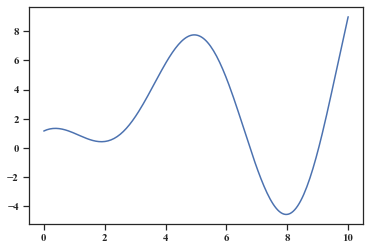

In [133]:
X0=x
y1 = add(mul(neg(X0), sin(X0)), add(log(add(mul(-0.387, X0), -0.387)), neg(log(0.121))))

# Se puede simplificar a la expresion:
y2 = -X0*np.sin(X0) + np.log(X0+1) + 1.1626341474330406

y_correct = 0.64+np.log(x+1)-np.sin(x)*x
#y = mul(sub(sin(X0), neg(-0.381)), add(neg(X0), sin(X0)))
#(sin(x0)-0.381)*(-x0 + sin(x0))

#y = add(neg(log(0.054)), mul(neg(add(sin(sin(mul(add(X0, 0.555), neg(sin(sin(X0)))))), sub(-0.218, X0))), neg(sin(sin(X0)))))
plt.plot(x,y1)
#plt.plot(x,y_correct)
#plt.plot(x,fun[-1])

In [130]:
print(est_gp)
est_gp._program.parents
#print(est_gp.raw_fitness_)
delattr(est, '_programs')


add(mul(neg(X0), sin(X0)), add(log(add(mul(-0.387, X0), -0.387)), neg(log(0.121))))


{'method': 'Reproduction', 'parent_idx': 4799, 'parent_nodes': []}